In [11]:
import pandas as pd

df = pd.read_csv("CN_A2_TCP.csv")
df

,No.,Time,Source,Destination,Protocol,Length,Info
0,1,0.000000,127.0.0.1,127.0.0.1,TCP,580,"57294 > 8010 [PSH, ACK] Seq=1 Ack=1 Win=1174..."
1,2,0.000086,127.0.0.1,127.0.0.1,TCP,68,8010 > 57294 [ACK] Seq=1 Ack=513 Win=2934 Le...
2,3,0.013453,127.0.0.1,127.0.0.1,TCP,580,"8010 > 57294 [PSH, ACK] Seq=1 Ack=513 Win=29..."
3,4,0.013733,127.0.0.1,127.0.0.1,TCP,580,"57294 > 8010 [PSH, ACK] Seq=513 Ack=513 Win=..."
4,5,0.013769,127.0.0.1,127.0.0.1,TCP,68,8010 > 57294 [ACK] Seq=513 Ack=1025 Win=2943...
...,...,...,...,...,...,...,...
2395,3225,121.273899,127.0.0.1,127.0.0.1,TCP,580,"57294 > 8010 [PSH, ACK] Seq=490497 Ack=24524..."
2396,3226,121.273951,127.0.0.1,127.0.0.1,TCP,68,8010 > 57294 [ACK] Seq=245249 Ack=491009 Win...
2397,3227,121.281094,127.0.0.1,127.0.0.1,TCP,580,"8010 > 57294 [PSH, ACK] Seq=245249 Ack=49100..."
2398,3228,121.281231,127.0.0.1,127.0.0.1,TCP,580,"57294 > 8010 [PSH, ACK] Seq=491009 Ack=24576..."


In [28]:
def throughput(file_size,time):
    
    return file_size/time

tp_arr = []
x=[]
y=[]
i=0

file_size=df["Length"][0]
start_time=df["Time"][0]

while i<len(df):
    
    temp_start=df["Time"][i]
    i+=1
    
    while i<len(df) and df["Time"][i]-temp_start < 2:
        file_size+=df["Length"][i]
        i+=1
             
    if i<len(df):
        x.append(df["Time"][i]-start_time)
        tp_arr.append(throughput(file_size,df["Time"][i]-start_time))
        
    else:
        x.append(df["Time"][i-1]-start_time)
        tp_arr.append(throughput(file_size,df["Time"][i-1]-start_time))
        
    y.append(file_size)

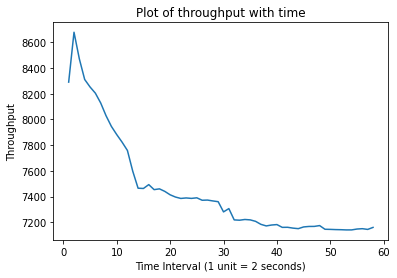

In [34]:
import matplotlib.pyplot as plt

lol = [i for i in range(1,len(tp_arr)+1)]
plt.plot(lol,tp_arr)
plt.xlabel("Time Interval (1 unit = 2 seconds)")
plt.ylabel("Throughput")
plt.title("Plot of throughput with time")
plt.show()